#                                   ΕΡΓΑΣΊΑ ΚΑΤΗΓΟΡΙΟΠΟΊΗΣΗΣ (CLASSIFICATION)

Στόχος αυτού του project είναι να κάνουμε λήψη των δεδομένων μας, να τα προετοιμάσουμε κατάλληλα, να παρουσιάσουμε οπτικά τα δεδομένα με διάφορα διαγράμματα, έτσι ώστε στη συνέχεια να πάρουμε και τις αντίστοιχες αποφάσεις, να εκτελέσουμε προεπεξεργασία στο σύνολο δεδομένων και να δοκιμάσουμε διάφορα μοντέλα κατηγοριοποίησης (classification), να τα δοκιμάσουμε ξανά έχοντας βρει αυτή τη φορά πρώτα τις βέλτιστες υπερ-παραμέτρους για αυτά, να παρουσιάσουμε (και οπτικά) τα αποτελέσματα και τη ευστοχία των αντίστοιχων μοντέλων και τέλος να τα αξιολογήσουμε και να καταλήξουμε στο κατάλληλο για το σύνολο μας μοντέλο κατηγοριοποίησης.

Αρχικά, τα ανεπεξέργαστα δεδομένα, εισάγονται σε κατάλληλη δομή δεδομένων της βιβλιοθήκης Pandas, χωρίζονται σε στήλες (όπου υπάρχει κόμμα), δίνονται τα ονόματα των Attributes  ως επικεφαλίδες στηλών και παρουσιάζονται για να δολυμε αν η διαμόρφωση τους και η προετοιμασία τους έγινε σωστά.

In [1]:
import pandas as pd
#Λήψη ανεπεξέργαστου συνόλου δεδομένων από το αρχείο csv. Οι τιμές των διαφορετικών Attributes χωρίζονται με ','
entry1=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', sep= ',',
                   names= ['NumofTimesPregn', 'PlasmaGlucConc', 'DiabBloodPress', 'TricSkinFoldThick', 'Insulin', 'BMI', 'DiabPedigreeFunc', 'Age', 'ClassVar'])
#Εκτύπωση προετοιμασμένου συνόλου δεδομένων, που έχει εισαχθεί σε κατάλληλη δομή δεδομένων
print(entry1)

     NumofTimesPregn  PlasmaGlucConc  DiabBloodPress  TricSkinFoldThick  \
0                  6             148              72                 35   
1                  1              85              66                 29   
2                  8             183              64                  0   
3                  1              89              66                 23   
4                  0             137              40                 35   
..               ...             ...             ...                ...   
763               10             101              76                 48   
764                2             122              70                 27   
765                5             121              72                 23   
766                1             126              60                  0   
767                1              93              70                 31   

     Insulin   BMI  DiabPedigreeFunc  Age  ClassVar  
0          0  33.6             0.627   50    

Ένας καλός τρόπος οπτικοποίησης των δεδομένων είναι μέσω ιστογραμμάτων για την κάθε μεταβλητή. Μας δίνουν μια καλή εικόνα για την κατανομή που αυτές ακολουθούν, κάτι το οποίο παίζει σημαντκό ρόλο, κατά την διαδικασία επιλογής μεταβλητής στόχου (Target Variable).

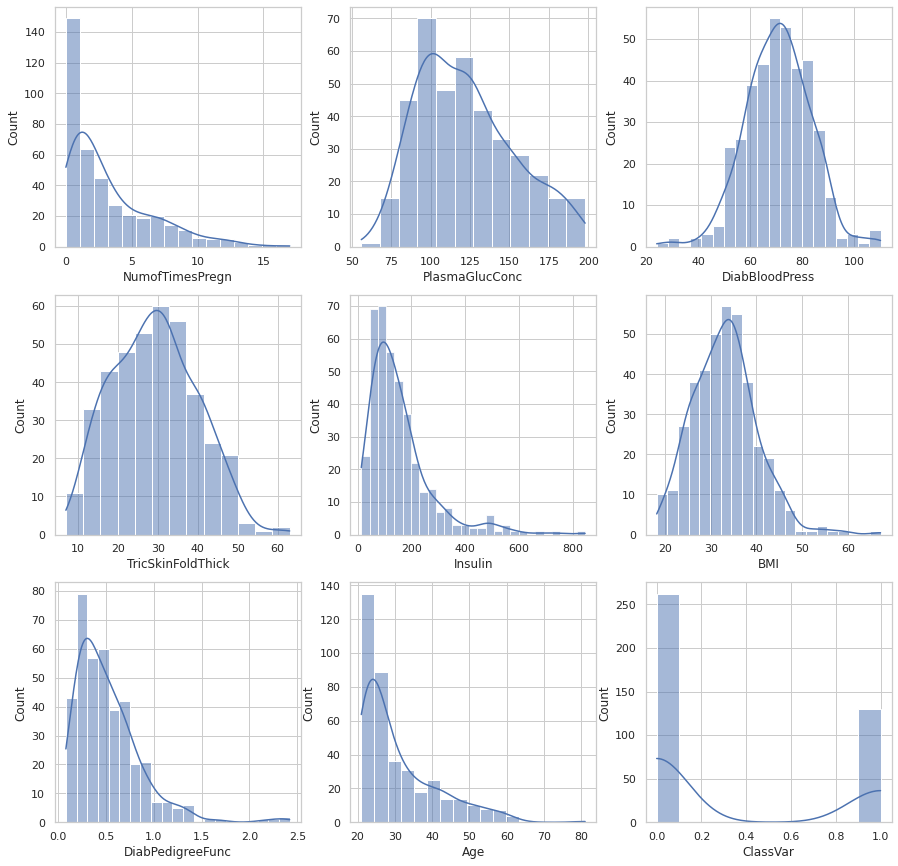

In [3]:
import matplotlib.pyplot as plt
#Δημιουργία Ιστογραμμάτων για καθε μεταβλητή
import seaborn as sns 
sns.set(font_scale=1)
sns.set_style('whitegrid')


#Ένα subplot για κάθε μεταβλητη
#3 στήλες και 3 γραμμές αφού΄έχουμε 9 attributes
n_rows=3
n_cols=3

#Υλοποίηση των subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
for i, column in enumerate(entry1):
#print(i,'---', column)
    sns.histplot(data=entry1, x=column, kde=True, ax=axes[i // n_cols, i % n_cols])

Συνήθως, προτιμάται να επιλέγεται ως μεταβλητή στόχος η μεταβλητή η οποία ακολουθεί όσο πιο ομοιόμορφη κατανομή γίνεται. Από τα παραπάνω ιστογράμματα, παρατηρούμε οτι σχετικά ομοιόμορφα κατανέμονται διαάφορες μεταβλητές, όπως η DiaBloodPress κ.λ.π., αλλά περισσότερο ομοιόμορφα απ' όλες κατανέμεται η ClassVar. Πολύ σημαντική πλγροφορία για αργότερα.

Ύστερα βρίσκουμε τις συσχείσεις μεταξύ όλων των ζεύγων μεταβλητών, με πεδίο τιμών από -1 έως 1 και οπτικοποιούμε τα αποτελέσματα αυτά με τη χρήση ενός Heatmap.

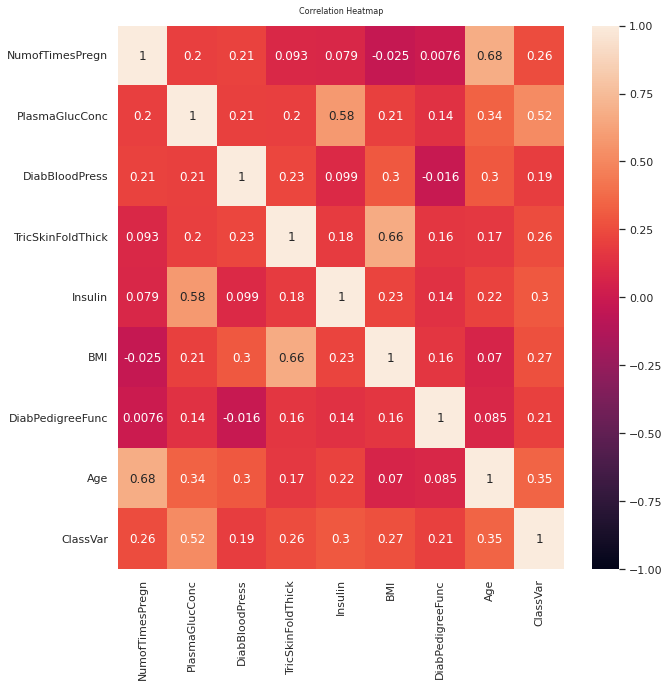

In [4]:
#Παρουσίαση συσχετίσεων μεταξύ μεταβλητών με πεδίο τιμών από το -1 ως το 1
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
#Καταχώρηση του αντικειμένου Heatmap σε μια βοηθητική μεταβλητή, έτσι ώστε να έχουμε πιο εύκολα πρόσβαση σεαυτό
#Ορισμός πεδίου τιμών από -1 έως 1 και annot=True για να φαίνοτναι οι στήλες με τα μεγέθη
Heatmap1 = sns.heatmap(entry1.corr(), vmin=-1, vmax=1, annot=True)
#Τίτλος και απόσταση απόμτο ίδιο το Heatmap
Heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)
plt.show()

Παρατηρείται οτι μεγάλη συσχέτιση υπάρχει μεταξύ Ηλικίας και Φορών που μία έχει μείνει κάποια έγκυος (αναμενόμενο) και του Plasma glucose concentration με το BMI.

Κατόπιν, μπορούμε να ελέγξουμε τη συσχέτιση των μεταβλητών, μέσω και διαγραμμάτων διασποράς (Pair Plots), ένα για κάθε ζέυγος μεταβλητών. Αν και ασχολούμαστε με κατηγοριοποίηση (classification) και όχι παλινδόμηση (regression), επέλεξα να βάλω να φαίνεται μαζί και η ευθεία παλινδρόμησης για το κάθε ζεύγος με kind="reg", διότι πιστεύω οτι αποτελεί ενδιαφέρουσα επιπρόσθετη πληροφορία για την διαδικασία μας.

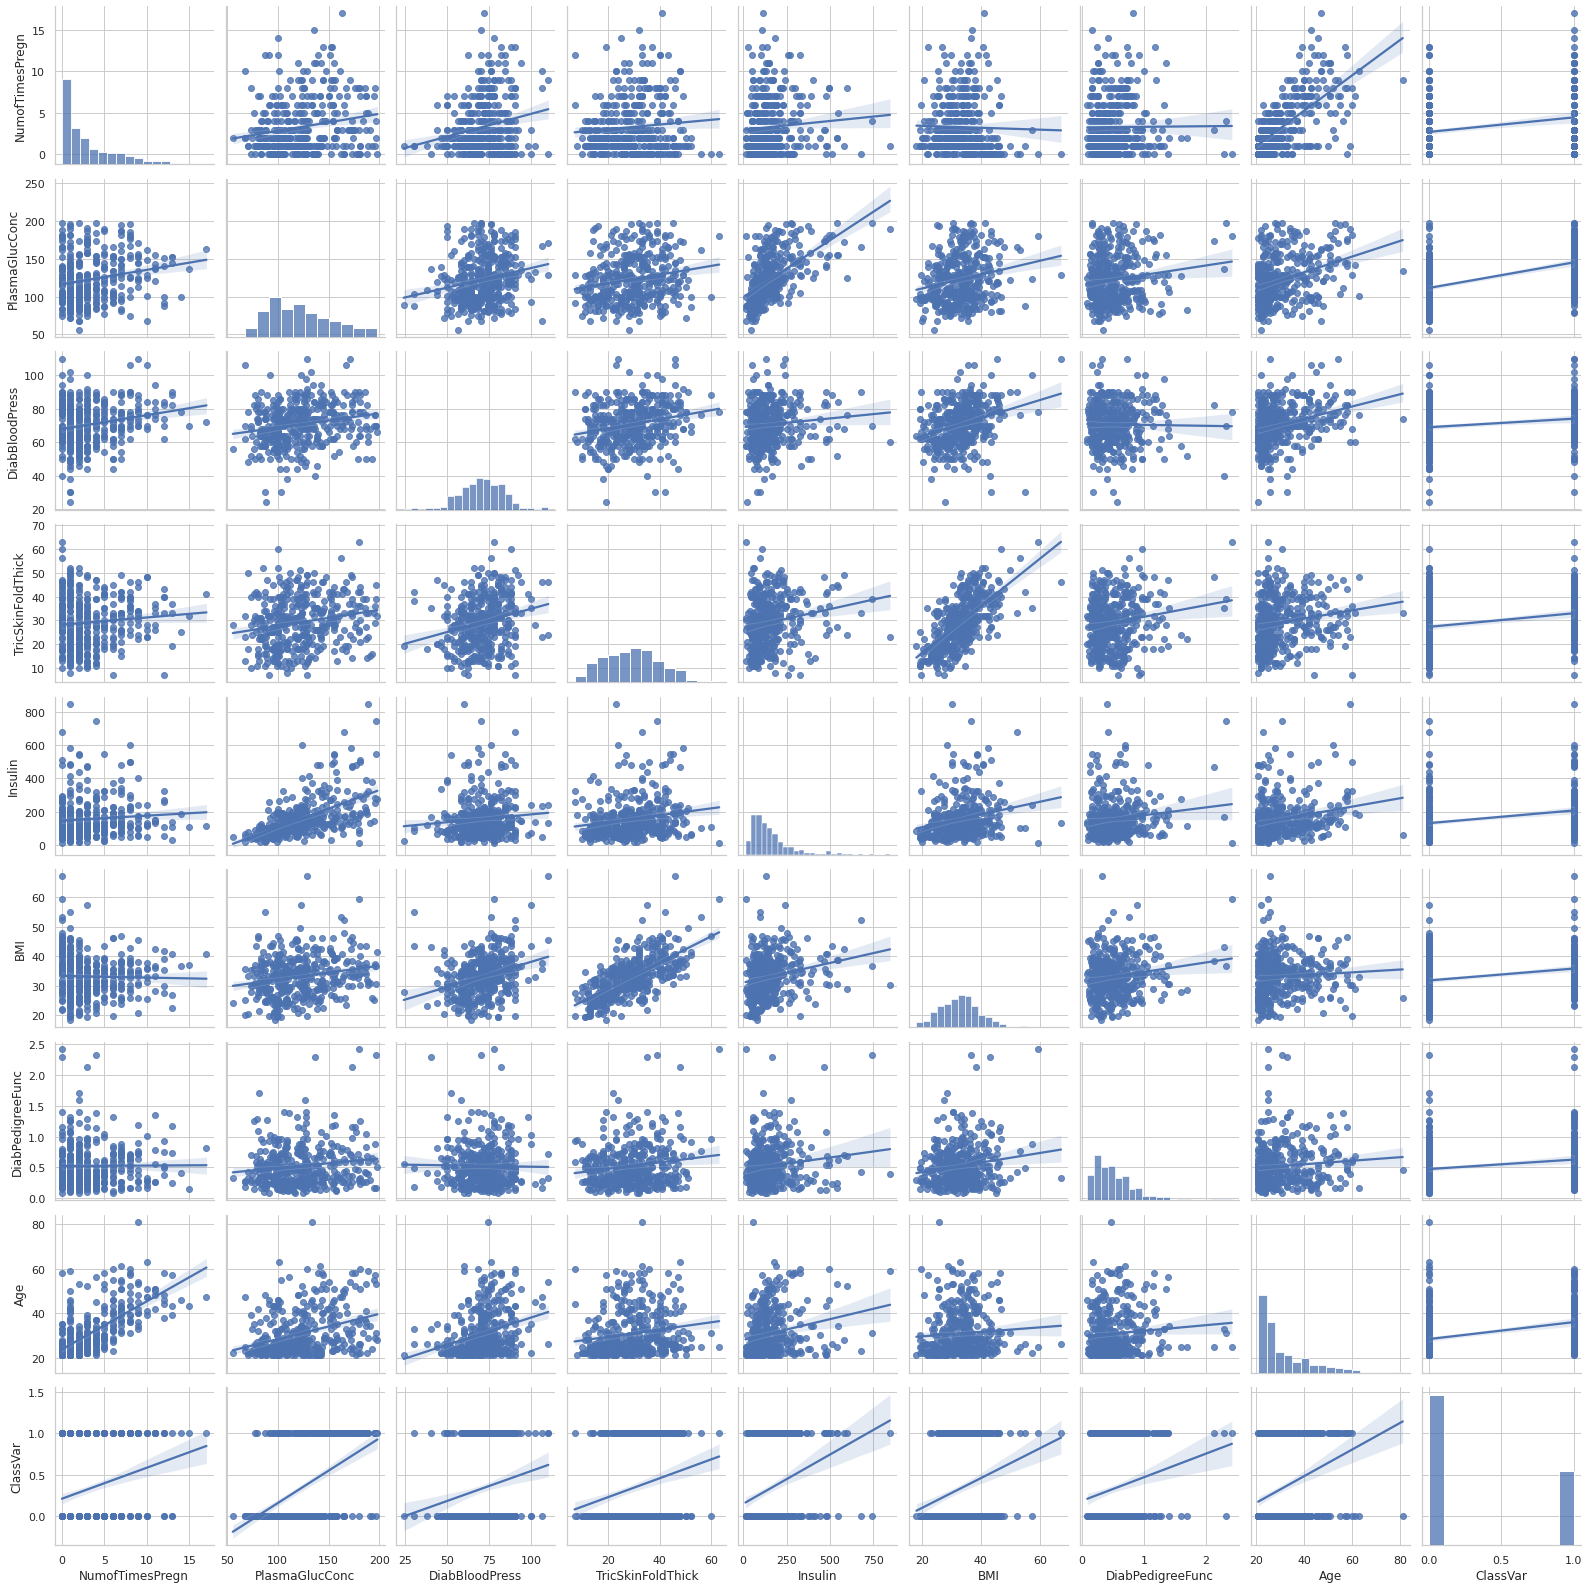

In [5]:
#Δημιουργία ενός pairplot για κάθε ζεύγος μεταξύ των μεταβλητών με kind="reg" για να φαίνεται μαζί και η ευθεία παλινδρόμησης στο καθένα
PairPlot1=sns.pairplot(data=entry1, vars=entry1.columns, kind="reg")


Παιρνάμε στην αφετηρία του κύριου μέρους του project. 
Πρώτο κομμάτι αυτού, αποτελεί η διαδικασία προεπεξεργασίας και κλιμάκωσης των δεδομένων, μέσω μεθόδων κανονικοποίησης (normalization) και μεθόδων τυποποίησης (standarization), έτσι ώστε όλες οι μεταβλητές να αναφέρονται σε μια κοινή κλίμακα ([0,1])

In [7]:
from sklearn.preprocessing import StandardScaler
#Προεπεξεργασία δεδομένων και εκχώρηση σε κατάλληλο Dataframe
scaled_columns = StandardScaler().fit_transform(entry1.values)
entry1_scaled = pd.DataFrame(scaled_columns, index=entry1.index, columns=entry1.columns)


Ύστερα, πρέπει να έχουμε τρόπους για να αξιολογήσουμε την ποιότητα των μοντέλων και την ευστοχία τους. Αυτό θα γίνεται μέσω της μεθόδου "classification_report", αλλά εμείς εδώ φτιάχνουμε και μια συνάρτηση, που επιστρέφει το RMSE και το r^2 αντίστοιχα. Αν και τα τελευταία 2 δεν αποτελούν ιδανικά μετρικά για τη ποιότητα και την ευστοχία του μοντέλου, όταν έχουμε να κάνουμε με καηγοριοποίηση (και όχι παλινδρόμηση), η παρουσίαση αυτών δίπλα στα έγκυρα αποτελέσματα ("Accuracy"), έχει αρκετό ενδιαφέρον και αυτό όσο αναφορά τη σύγκριση κατηγοριοποίησης-παλινδρόμησης.

In [8]:
#Συνάρτηση η οποία επιστρέφει τα RMSE και R^2
from sklearn.metrics import mean_squared_error,r2_score

import numpy as np 

def metrics(labels,predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    r2_value=r2_score(labels,predictions)
    print(f'RMSE for Train Set: {rmse}')
    print(f'r_squared (Coefficient of Determination): {r2_value}')
    #return rmse,r2_value


Σύμφωνα με τα παραπάνω διαγράμματα και τα κρητίρια γαι την επιλογή μεταβλητής στόχου (target variable) που προαναφέρθηκαν, αποφάσισα οτι ιδανική επιλογή για μεταβλητή στόχο (target variable) αποτελεί η 'ClassVar'. Έτσι δημιουργούνται με αυτή τα απαρίτητα σύνολα εκπαίδευσης (train set) και ελέγχου (test set), έτσι ώστε να εκπαιδευτεί ο αλγόριθμος και να ανταποκρίνεται με σωστό τρόπο σε μελλοντικά δεδομένα.

In [9]:
from sklearn.model_selection import train_test_split
#Δημιουργία Συνόλων Εκπαίδευσης και Ελέγχου
train_set, test_set = train_test_split(entry1_scaled, test_size=.4, random_state=42)

predictors_train = train_set.drop('ClassVar', axis=1)

labels_train = entry1.loc[predictors_train.index,'ClassVar']

predictors_test = test_set.drop('ClassVar', axis=1)

labels_test = entry1.loc[predictors_test.index,'ClassVar']

Ξεκινάμε την εκπαίδευση διάφορων μοντέλων και την παρουσίαση των αντίστοιχων αποτελεσμάτων για αυτά και τα δεδομένα μας κάθε φορά. Η παρακάτω διαδικασία θα είναι παρόμοια, αν όχι ίδια για κάθε μοντέλο που δοκιμάζουμε στη συνέχεια.  Αρχικά εκπαιδεύουμε το μοντέλο με την χρήση του συνόλου εκπαίδευσης training set (predictors_train, labels_train). Ξεκινάμε με το πρώτο μοντέλο:

# **Decision Tree Classifier:**

In [10]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DTC.fit(predictors_train, labels_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Αμέσως μετά, υποδεικνύουμε τα αποτελέσματα για το μοντέλο αυτό, δίνοντας έμφαση συγκεκριμένα στην ευστοχία της πρόβλεψης "percision".

In [11]:
from sklearn.metrics import classification_report

#Χρήση μοντέλου για πρόβλεψη μεταβλητής στόιχου
predictions_train = DTC.predict(predictors_train)
#Δείκτης του πόσο καλά τα training data ταιριάζουν με το μοντέλο
print("Decision Tree Classifier (Training Set)")
metrics(labels_train,predictions_train)
predictions_test = DTC.predict(predictors_test)
print("Decision Tree Classifier (Test Set)")
metrics(labels_test,predictions_test)
#Δείκτης του πόσο καλά γίνεται πρόβλεψη
print("Accuracy Metrics: \n")
print(classification_report(labels_test,predictions_test))


Decision Tree Classifier (Training Set)
RMSE for Train Set: 0.40212203080604086
r_squared (Coefficient of Determination): 0.2753975981824085
Decision Tree Classifier (Test Set)
RMSE for Train Set: 0.517219415303485
r_squared (Coefficient of Determination): -0.21975582685904538
Accuracy Metrics: 

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       106
           1       0.60      0.55      0.57        51

    accuracy                           0.73       157
   macro avg       0.69      0.68      0.69       157
weighted avg       0.73      0.73      0.73       157



Παρατηρούμε ακρίβεια γύρω στο: 79%

Ιδανική για την αξιολόγηση των μοντέλων αποτελεί και η οπτικοποίηση των αποτελεσματων και συγκεκριμένα μέσω ενός Confusion Matrix, που είναι ιδανικό για περιπτώσεις κατηγοριοποίησης. Παρουσιάζεται από κάτω το confusion matrix ξανά και με ένα heatmap, για λόγους ομορφιάς στην παρουσίαση, καθώς και ευκολίας στον αναγνώστη

[[87 19]
 [23 28]]


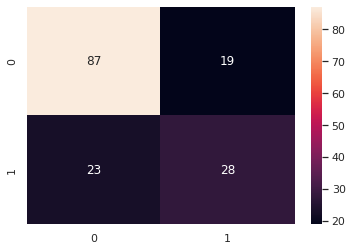

In [12]:
#Οπτικοποίηση αποτελέσματος με χρήση Confusion Matrix και αντίστοιχου heatmap για αυτό
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(labels_test,predictions_test)

print(CM)

sns.heatmap(CM, annot = True)

# **Gaussian Naive Bayes Model:**

In [13]:
#Gaussian Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

GNB = GaussianNB()
GNB.fit(predictors_train, labels_train)

predictions_train = GNB.predict(predictors_train)
print("Gaussian Naive Bayes (Training Set)")
metrics(labels_train,predictions_train)
print("Gaussian Naive Bayes (Test Set)")
predictions_test = GNB.predict(predictors_test)
metrics(labels_test,predictions_test)
print("Accuracy Metrics: \n")
print(classification_report(labels_test,predictions_test))

Gaussian Naive Bayes (Training Set)
RMSE for Train Set: 0.44243042487046913
r_squared (Coefficient of Determination): 0.12284972411554707
Gaussian Naive Bayes (Test Set)
RMSE for Train Set: 0.517219415303485
r_squared (Coefficient of Determination): -0.21975582685904538
Accuracy Metrics: 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       106
           1       0.59      0.59      0.59        51

    accuracy                           0.73       157
   macro avg       0.70      0.70      0.70       157
weighted avg       0.73      0.73      0.73       157



Παρατηρούμε ακρίβεια γύρω στο: 80%

[[85 21]
 [21 30]]


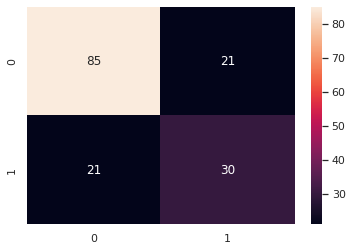

In [14]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(labels_test,predictions_test)

print(CM)

sns.heatmap(CM, annot = True)

# **KNN Algorithm (Χωρίς Βελτιστοποίηση):**

In [17]:
#KNN Algorithm (Χωρίς Βελτιστοποίηση)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNNCl = KNeighborsClassifier(n_neighbors=5)
KNNCl.fit(predictors_train, labels_train)

predictions_train = KNNCl.predict(predictors_train)
print("KNN algorithm (Training Set)")
metrics(labels_train,predictions_train)
print("KNN algorithm (Test Set)")
predictions_test = KNNCl.predict(predictors_test)
metrics(labels_test,predictions_test)
print("Accuracy Metrics: \n")
print(classification_report(labels_test,predictions_test))

KNN algorithm (Training Set)
RMSE for Train Set: 0.3967956760231118
r_squared (Coefficient of Determination): 0.2944660824407661
KNN algorithm (Test Set)
RMSE for Train Set: 0.4919737966198094
r_squared (Coefficient of Determination): -0.10358860525342206
Accuracy Metrics: 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       106
           1       0.64      0.57      0.60        51

    accuracy                           0.76       157
   macro avg       0.72      0.71      0.71       157
weighted avg       0.75      0.76      0.75       157



Παρατηρούμε ακρίβεια γύρω στο: 80%

[[90 16]
 [22 29]]


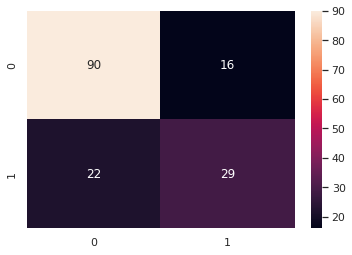

In [18]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(labels_test,predictions_test)

print(CM)

sns.heatmap(CM, annot = True)

Για να αποκομίσουμε την βέλτιστη δυνατή απόδοση από ένα μοντέλο κατηγοριοποίησης, θα πρέπει να βρούμε τις βέλτιστες τιμές για τις υπερ-παραμέτρους του μοντέλου (στο συγκεκριμένο είναι η n_neighbors). Οι υπερ-παράμετροι ενός μοντέλου είναι εκείνες οι παράμετροι που πρέπει να οριστούν από εμάς πριν από την έναρξη της διαδικασίας εκπαίδευσης του μοντέλου και την επηρεάζουν αισθητά. Για την εύρεση αυτή λοιπόν, χρησιμοποιείται GridSearchCV (grid search με cross validation).

# **KNN Algorithm (Με Βελτιστοποίηση):**

In [43]:
#Εύρεση βέλτιστων υπερ-παραμέτρων για το μοντέλο (n_neighbors) και παρουσίαση αποτελεσμάτων
from sklearn.model_selection import GridSearchCV

KNN2=KNeighborsClassifier()
k_range=list(range(1,31))
param_grid = dict(n_neighbors=k_range)
Grid1 = GridSearchCV(KNN2, param_grid, cv=10, scoring='accuracy',return_train_score=False)
grid_search = Grid1.fit(predictors_train, labels_train)
print("Best Parameters:",grid_search.best_params_)
accuracy = grid_search.best_score_ * 100
grid_predictions=Grid1.predict(predictors_test)
predictions_train = Grid1.predict(predictors_train)
print("KNN algorithm (Training Set)")
metrics(labels_train,predictions_train)
print("KNN algorithm (Test Set)")
predictions_test = Grid1.predict(predictors_test)
metrics(labels_test,predictions_test)
print("\nAccuracy Metrics:")
print(str(accuracy)+"%")

Best Parameters: {'n_neighbors': 10}
KNN algorithm (Training Set)
RMSE for Train Set: 0.42275690917514186
r_squared (Coefficient of Determination): 0.19912366114897784
KNN algorithm (Test Set)
RMSE for Train Set: 0.5293909491765643
r_squared (Coefficient of Determination): -0.2778394376618569

Accuracy Metrics:
80.09057971014492%


Παρατηρούμε ακρίβεια γύρω στο: 80.1%

[[88 18]
 [26 25]]


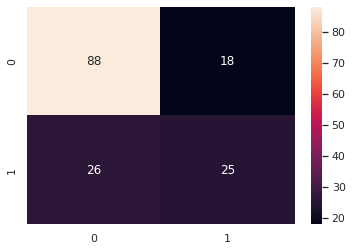

In [41]:
from sklearn.metrics import confusion_matrix

CM= confusion_matrix(labels_test, grid_predictions)

print(CM)

sns.heatmap(confusion_matrix(labels_test, grid_predictions), annot = True)

# **Random Forest Classifier (Χωρίς Βελτιστοποίηση):**

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

RFC = RandomForestClassifier(random_state=0)
RFC.fit(predictors_train, labels_train)

predictions_train = RFC.predict(predictors_train)
print("Random Forest Classifier (Training Set)")
metrics(labels_train,predictions_train)
print("Random Forest Classifier (Test Set)")
predictions_test = RFC.predict(predictors_test)
metrics(labels_test,predictions_test)
print("Accuracy Metrics: \n")
print(classification_report(labels_test,predictions_test))

Random Forest Classifier (Training Set)
RMSE for Train Set: 0.0
r_squared (Coefficient of Determination): 1.0
Random Forest Classifier (Test Set)
RMSE for Train Set: 0.4721545682355858
r_squared (Coefficient of Determination): -0.016463189049204408
Accuracy Metrics: 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.67      0.63      0.65        51

    accuracy                           0.78       157
   macro avg       0.75      0.74      0.74       157
weighted avg       0.77      0.78      0.78       157



Παρατηρούμε ακρίβεια γύρω στο: 83%

[[90 16]
 [19 32]]


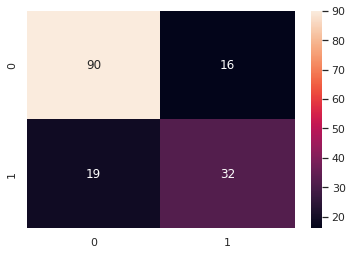

In [23]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(labels_test,predictions_test)

print(CM)

sns.heatmap(confusion_matrix(labels_test,predictions_test), annot = True)

# **Random Forest Classifier (Με Βέλτιστες Υπερ-Παραμέτρους):**

In [ ]:
#Εύρεση βέλτιστων υπερ-παραμέτρων για το μοντέλο και παρουσίαση αποτελεσμάτων
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200,500,1000],'max_features':["sqrt","log2",None],'criterion':["gini", "entropy", "log_loss"], "oob_score":[True, False],"warm_start":[True,False],"class_weight":["balanced","balanced_subsample",None]}

Grid2= GridSearchCV(RandomForestClassifier(), param_grid, refit=True,verbose=1)
Grid2.fit(predictors_train, labels_train)
print("Best estimator:",Grid2.best_estimator_)
grid_predictions=Grid2.predict(predictors_test)


predictions_train = Grid2.predict(predictors_train)
print("Random Forest Classifier (Training Set)")
metrics(labels_train,predictions_train)
print("Random Forest Classifier (Test Set)")
predictions_test = Grid2.predict(predictors_test)
metrics(labels_test,predictions_test)
print("Accuracy Metrics: \n")
print(classification_report(labels_test,grid_predictions))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

Παρατηρούμε ακρίβεια γύρω στο: 89%

[[89 17]
 [22 29]]


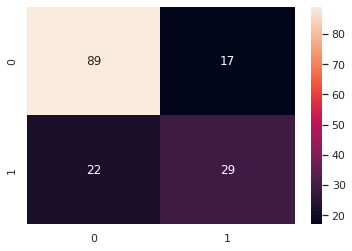

In [38]:
from sklearn.metrics import confusion_matrix

CM= confusion_matrix(labels_test, grid_predictions)

print(CM)

sns.heatmap(confusion_matrix(labels_test, grid_predictions), annot = True)

# **Support Vector Machines Model:**

In [47]:
#Support Vector Machines Model
from sklearn import svm 
from sklearn.metrics import classification_report

SVMm = svm.SVC()
SVMm.fit(predictors_train, labels_train)

predictions_train = SVMm.predict(predictors_train)
print("Random Forest Classifier (Training Set)")
metrics(labels_train,predictions_train)
print("Random Forest Classifier (Test Set)")
predictions_test = SVMm.predict(predictors_test)
metrics(labels_test,predictions_test)
print("Accuracy Metrics: \n")
print(classification_report(labels_test,predictions_test))

Random Forest Classifier (Training Set)
RMSE for Train Set: 0.3747339481750935
r_squared (Coefficient of Determination): 0.3707400194741969
Random Forest Classifier (Test Set)
RMSE for Train Set: 0.5293909491765643
r_squared (Coefficient of Determination): -0.2778394376618569
Accuracy Metrics: 

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       106
           1       0.57      0.53      0.55        51

    accuracy                           0.72       157
   macro avg       0.68      0.67      0.67       157
weighted avg       0.71      0.72      0.72       157



Παρατηρούμε ακρίβεια γύρω στο: 78%

[[90 16]
 [22 29]]


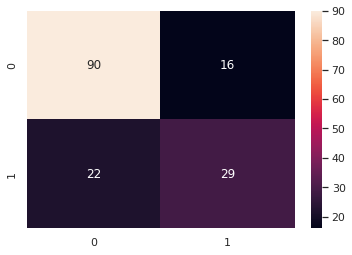

In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(labels_test,predictions_test))

sns.heatmap(confusion_matrix(labels_test,predictions_test), annot = True)

# **Support Vector Machines Model (Με Βέλτιστες Υπερ-Παραμέτρους):**

In [46]:
#Εύρεση βέλτιστων υπερ-παραμέτρων για το μοντέλο και παρουσίαση αποτελεσμάτων
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear','rbf','poly','sigmoid']}
Grid3= GridSearchCV(svm.SVC(), param_grid, refit=True,verbose=1)
Grid3.fit(predictors_train, labels_train)
print("Best estimator:",Grid3.best_estimator_)
grid_predictions=Grid3.predict(predictors_test)
m=confusion_matrix(labels_test, grid_predictions)
print(classification_report(labels_test,grid_predictions))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best estimator: SVC(C=1, gamma=0.1, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       106
           1       0.63      0.57      0.60        51

    accuracy                           0.75       157
   macro avg       0.72      0.70      0.71       157
weighted avg       0.75      0.75      0.75       157



Παρατηρούμε ακρίβεια γύρω στο: 80%

[[89 17]
 [22 29]]


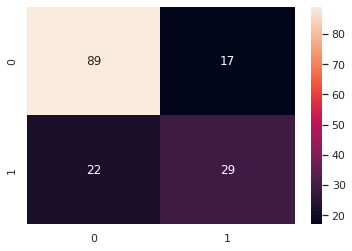

In [28]:
from sklearn.metrics import confusion_matrix

CM= confusion_matrix(labels_test, grid_predictions)

print(CM)

sns.heatmap(confusion_matrix(labels_test, grid_predictions), annot = True)

**Συμπεραίνουμε λοιπόν οτι τα Top 3 Μοντέλα Κατηγοριοποίησης με την μεγαλύτερη ευστοχία στην πρόβλεψη, για το σύνολο δεδομένων μας, είναι τα εξής:**

# **- Random Forest Classifier (Με Βέλτιστες Υπερ-Παραμέτρους): 89%**
# **- Random Forest Classifier (Χωρίς Βελτιστοποίηση): 83%**
# **- KNN Algorithm (Με Βελτιστοποίηση): 80.1%**

**Πηγές - Βιβλιογραφία:**

•	https://omdena.com/blog/machine-learning-classification-algorithms/

•	https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/

•	https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

•	https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

•	https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

•	https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

•	https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

•	https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

•	https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

•	https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

•	https://www.projectpro.io/recipes/generate-classification-report-and-confusion-matrix-in-python

•	https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f

•	https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

•	https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

•	Υλικό Εργαστηρίων Μαθήματος «Ανάλυση Δεδομένων»

•	Υλικό Διαφανειών Θεωρίας Μαθήματος «Ανάλυση Δεδομένων»

•	Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Anuj Karpatne, “Εισαγωγή στην Εξόρυξη Δεδομένων”, Εκδόσεις Τζιόλα, 2018



#                                        -Σωτήριος Δημητρακουλάκος / Ε20040